In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# =========================
# データ読み込み
# =========================
data_web_address = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

column_names = [
    'pregnancy_x',
    'plasma_con',
    'blood_pressure',
    'skin_mm',
    'insulin',
    'bmi',
    'pedigree_func',
    'age',
    'target'
]

feature_names = column_names[:-1]

all_data = pd.read_csv(data_web_address, names=column_names)

# =========================
# 特徴量・目的変数
# =========================
X = all_data[feature_names]
y = all_data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=7,
    stratify=y
)

# =========================
# 標準化
# =========================
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

# =========================
# ロジスティック回帰
# =========================
log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=1000,
    random_state=0
)
log_reg.fit(X_train_std, y_train)

# =========================
# 予測と評価
# =========================
y_pred = log_reg.predict(X_test_std)

print("混同行列（[1,0] の順）")
print(confusion_matrix(y_test, y_pred, labels=[1, 0]))

print("\n分類レポート")
print(classification_report(y_test, y_pred))

print("Train accuracy:", log_reg.score(X_train_std, y_train))
print("Test  accuracy:", log_reg.score(X_test_std, y_test))


混同行列（[1,0] の順）
[[31 23]
 [12 88]]

分類レポート
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Train accuracy: 0.7785016286644951
Test  accuracy: 0.7727272727272727


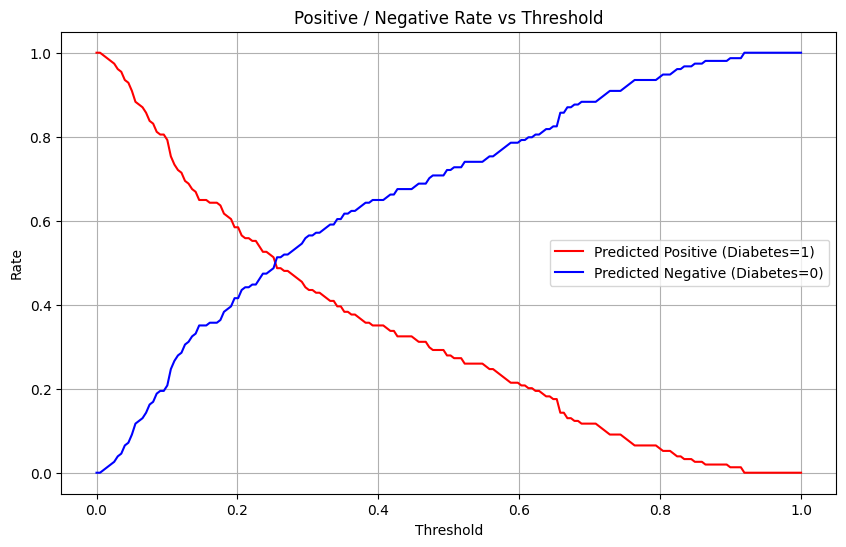

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 予測確率（diabetes=1 の確率）
y_proba = log_reg.predict_proba(X_test_std)[:, 1]

# 閾値のリスト（0〜1 を100点）
thresholds = np.linspace(0, 1, 200)

pos_rates = []   # diabetes=1 と予測される割合
neg_rates = []   # diabetes=0 と予測される割合

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    pos_rates.append(np.mean(y_pred_t == 1))  # 陽性率
    neg_rates.append(np.mean(y_pred_t == 0))  # 陰性率

plt.figure(figsize=(10,6))
plt.plot(thresholds, pos_rates, label="Predicted Positive (Diabetes=1)", color="red")
plt.plot(thresholds, neg_rates, label="Predicted Negative (Diabetes=0)", color="blue")

plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Positive / Negative Rate vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


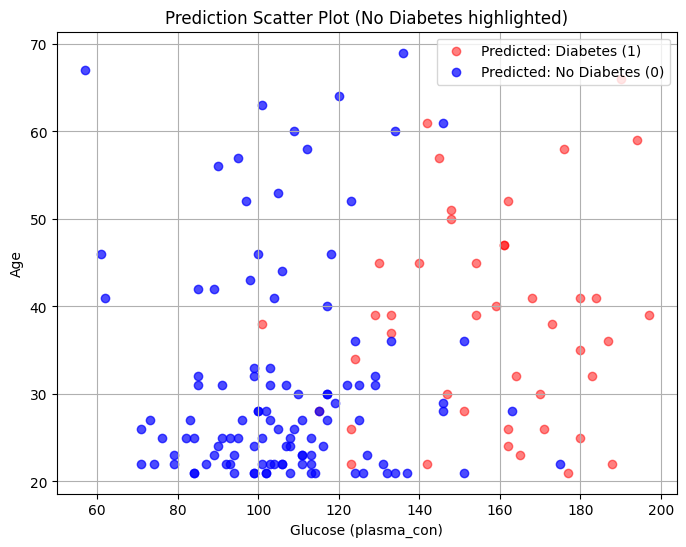

In [2]:
import matplotlib.pyplot as plt

# 予測
y_pred = log_reg.predict(X_test_std)

# no diabetes（＝0）を取り出すマスク
mask_no = y_pred == 0

plt.figure(figsize=(8,6))

# 予測が diabetes（1）
plt.scatter(
    X_test["plasma_con"][~mask_no],
    X_test["age"][~mask_no],
    color="red",
    alpha=0.5,
    label="Predicted: Diabetes (1)"
)

# 予測が no diabetes（0）
plt.scatter(
    X_test["plasma_con"][mask_no],
    X_test["age"][mask_no],
    color="blue",
    alpha=0.7,
    label="Predicted: No Diabetes (0)"
)

plt.xlabel("Glucose (plasma_con)")
plt.ylabel("Age")
plt.title("Prediction Scatter Plot (No Diabetes highlighted)")
plt.legend()
plt.grid(True)
plt.show()


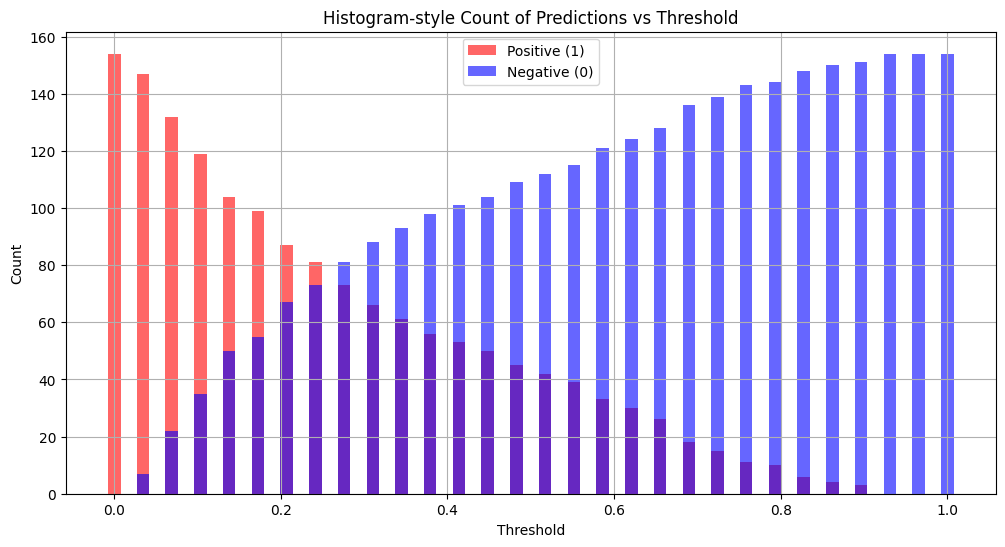

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 予測確率 (diabetes=1 の確率)
y_proba = log_reg.predict_proba(X_test_std)[:, 1]

# 閾値を bins のように扱う
thresholds = np.linspace(0, 1, 30)  # 30分割の“ヒストグラム風の棒”を作る

pos_counts = []
neg_counts = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    pos_counts.append(np.sum(y_pred_t == 1))   # 陽性件数
    neg_counts.append(np.sum(y_pred_t == 0))   # 陰性件数

plt.figure(figsize=(12,6))

plt.bar(thresholds, pos_counts, width=0.015, alpha=0.6, label="Positive (1)", color="red")
plt.bar(thresholds, neg_counts, width=0.015, alpha=0.6, label="Negative (0)", color="blue")

plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Histogram-style Count of Predictions vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


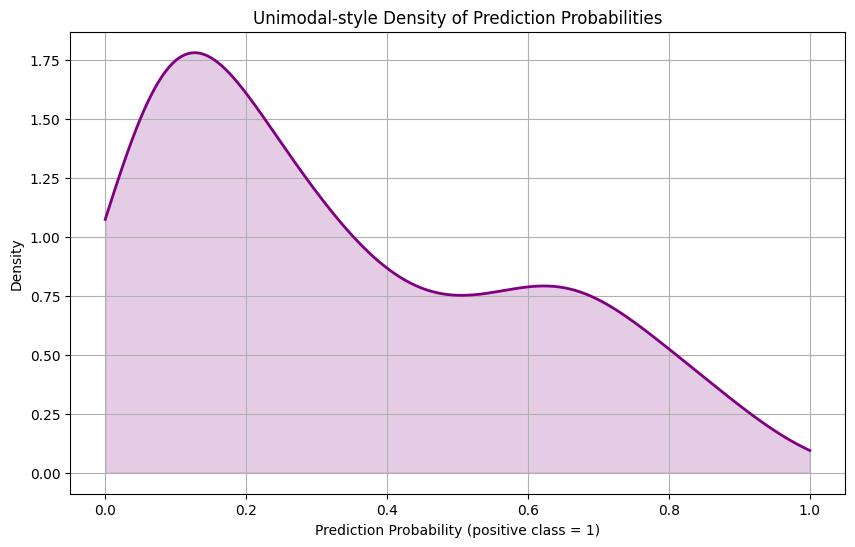

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 予測確率 (diabetes=1 の確率)
y_proba = log_reg.predict_proba(X_test_std)[:, 1]

# KDE（Gaussian Kernel Density Estimate）
kde = gaussian_kde(y_proba)
xs = np.linspace(0, 1, 400)
ys = kde(xs)

plt.figure(figsize=(10,6))
plt.plot(xs, ys, color="purple", linewidth=2)
plt.fill_between(xs, ys, alpha=0.2, color="purple")

plt.xlabel("Prediction Probability (positive class = 1)")
plt.ylabel("Density")
plt.title("Unimodal-style Density of Prediction Probabilities")
plt.grid(True)
plt.show()


"separation plot" や "overlapping density plot" 

🎯 最もわかりやすい“重ね合わせプロット” → KDE の重ね描き（陽性と陰性）

陽性・陰性の予測確率の分布を、
同じグラフ上で「重ねて描画」 すれば OK です。

平滑化（KDE）すると自然に単峰〜双峰的な重なりが見えます。

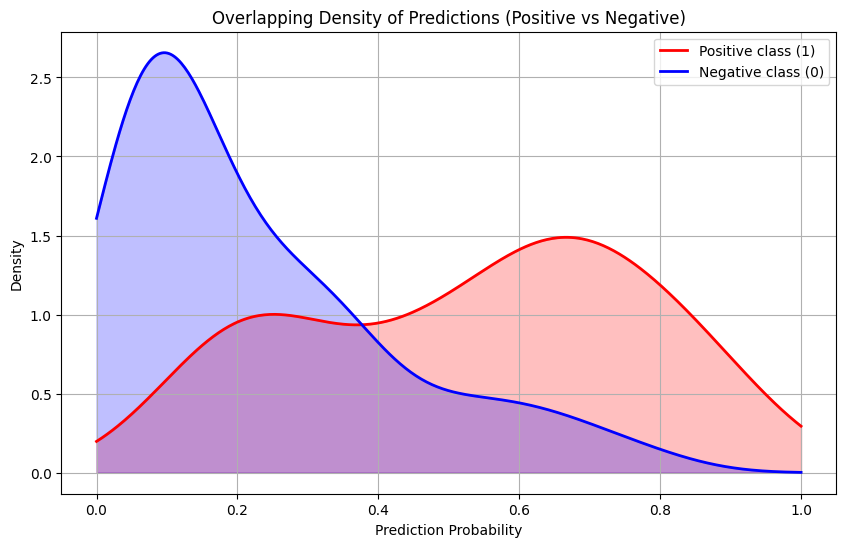

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 予測確率 (positive class = 1)
y_proba = log_reg.predict_proba(X_test_std)[:, 1]

# 陽性と陰性に分離
pos_proba = y_proba[y_test == 1]
neg_proba = y_proba[y_test == 0]

# KDE（平滑化）
kde_pos = gaussian_kde(pos_proba)
kde_neg = gaussian_kde(neg_proba)

xs = np.linspace(0, 1, 400)

plt.figure(figsize=(10,6))

# 陽性 = red
plt.plot(xs, kde_pos(xs), color="red", label="Positive class (1)", linewidth=2)
plt.fill_between(xs, kde_pos(xs), color="red", alpha=0.25)

# 陰性 = blue
plt.plot(xs, kde_neg(xs), color="blue", label="Negative class (0)", linewidth=2)
plt.fill_between(xs, kde_neg(xs), color="blue", alpha=0.25)

plt.xlabel("Prediction Probability")
plt.ylabel("Density")
plt.title("Overlapping Density of Predictions (Positive vs Negative)")
plt.legend()
plt.grid(True)
plt.show()


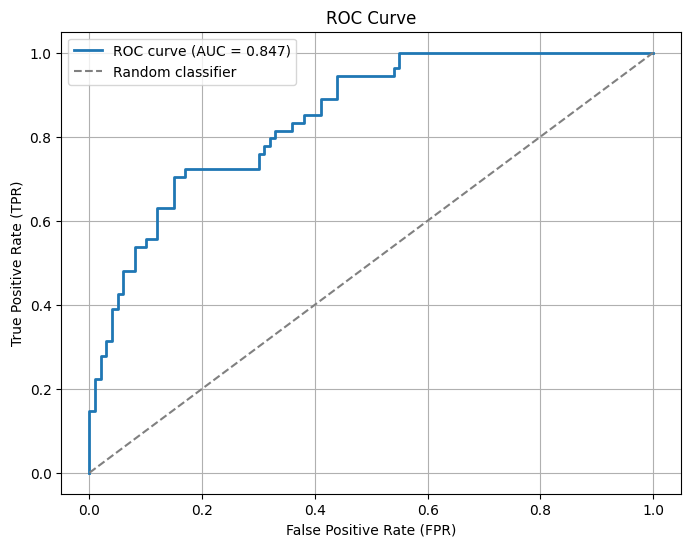

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 予測確率（positive class=1 の確率）
y_proba = log_reg.predict_proba(X_test_std)[:, 1]

# ROC 用の値
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})", linewidth=2)

# 対角線（ランダム分類ライン）
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Random classifier")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
